# **IMAGE CLASSIFICATION - WHITE BOOLD CELL**

## **Latar Belakang dan Persiapan Data**


Saat ini klasifikasi gambar memainkan peran penting dalam banyak bidang. Dapat kita sadari sekarang di media sosial contohnya, sistem pengenalan wajah akan secara otomatis mendeteksi wajah kita atau wajah teman kita dan menandai orang tersebut di postingan. Klasifikasi gambar adalah tempat komputer dapat menganalisis gambar dan mengidentifikasi 'kelas/keberagaman' gambar tersebut. Dalam hal ini, Saya akan membuat klasifikasi gambar untuk membantu bidang kedokteran dalam mengkategorikan basis data gambarnya menurut jenis sel.

**Klasifikasi Gambar Sel Darah Putih:**

Diagnosis penyakit berbasis darah seringkali melibatkan identifikasi dan karakterisasi sampel darah pasien. Metode otomatis untuk mendeteksi dan mengklasifikasikan subtipe sel darah memiliki aplikasi medis yang penting. Dengan menggunakan machine learning dengan penggunaan model CNN transfer learning dan juga menggunakan beberapa hypyerparameter tuning, diharapkan model klasifikasi sel darah dengan akurasi terbaik dapat digunakan sebagai prediksi klasifikasi secara cepat dan akurat.

**Hemopatologi** (hemo artinya darah, patologi artinya penyakit), adalah ilmu yang mempelajari penyakit melalui sel darah. Struktur sel darah yang tidak normal, tingkat jumlah sel darah, dan lain sebagainya merupakan beberapa faktor yang dapat digunakan untuk mengidentifikasi beberapa penyakit.

Beberapa penyakit, seperti leukemia, demam berdarah, thalassemia dan malaria, telah menandai perubahan jumlah sel darah putih. Hal ini dikarenakan beberapa jenis sel darah putih hanya dapat melawan jenis penyakit tertentu. Perubahan jumlah sel ini dapat digunakan untuk mengidentifikasi penyakit. Dengan begitu, penggunaan CNN dalam mengidentifikasi sel darah putih dapat bermanfaat sehingga proses identifikasi perubahan jumlah sel darah dapat dilakukan dengan cepat dan akurat menggunakan deep learning.

## **Tentang Data**

### [Blood Cell](https://github.com/Shenggan/BCCD_Dataset) 🩸

Kumpulan data ini berisi 12.500 gambar sel darah yang diperbesar (JPEG) dengan label tipe sel (CSV) yang menyertainya. Ada sekitar 3.000 gambar untuk masing-masing dari 4 jenis sel berbeda yang dikelompokkan ke dalam 4 folder berbeda (menurut jenis sel). Jenis sel adalah **Eosinofil, Limfosit, Monosit, dan Neutrofil.** Kumpulan data ini disertai dengan kumpulan data tambahan yang berisi 410 gambar asli (pra-augmentasi) serta dua label subtipe tambahan (WBC vs WBC) dan juga kotak pembatas untuk setiap sel di masing-masing 410 gambar ini (metadata JPEG + XML). Lebih khusus lagi, folder 'dataset-master' berisi 410 gambar sel darah dengan label subtipe dan kotak pembatas (JPEG + XML), sedangkan folder 'dataset2-master' berisi 2.500 gambar augmented serta 4 label subtipe tambahan (JPEG + CSV). Ada sekitar 3.000 gambar tambahan untuk setiap kelas dari 4 kelas dibandingkan dengan 88, 33, 21, dan 207 gambar masing-masing di folder 'dataset-master'.

Data yang digunakan saat ini menggunakan folder 'dataset2-master' yang mana sudah terbagi menjadi data TRAIN dan TEST dimana didalam tiap folder TRAIN dan TEST terdapat folder sesuai dengan kelas sel darah putihnya.

## **A. Data Preprocessing & Exploratory Data Analysis**
### **Import Library/Packages**

In [58]:
import os

# Neural Network Model
import tensorflow as tf
import keras 
import keras.applications as A
import keras.backend as B
from keras import regularizers
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *


from tensorflow.keras.layers import BatchNormalization, Lambda
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, RMSprop , SGD
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers , Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Model Tuner
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, GlobalMaxPool2D
from tensorflow.keras import Model
from keras_tuner.tuners import RandomSearch

# Visualisasi Confussion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
from shutil import copyfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import numpy as np

In [3]:
# Cek version Tensorflow 
print(tf.__version__) #Versi colab 2.9.2

2.6.4


Hal pertama yang harus kita lakukan adalah menguraikan data sebelum membangun model. Dalam masalah klasifikasi gambar, merupakan praktik umum untuk meletakkan setiap gambar pada folder terpisah berdasarkan kelas/label target. Misalnya, di folder kereta di data yang kita miliki, kita memiliki 2 folder utama yakni Train dan Test. Dimana kita perlu membaca datanya terlebih dahulu dan melakukan pembagian data train.

Dataset dibagi 80% untuk pelatihan/training dan 20% untuk validasi, karena kita perlu melatih dan mengevaluasi model sebelum digunakan untuk kasus nyata. Dataset latih akan digunakan untuk melatih model sedangkan dataset validasi digunakan untuk mengevaluasi model. Melakukan assign data Train dan Test. Untuk data Validation nanti didapatkan dari pembagian 80:20 dari dataset Train.



Pada prakteknya, kita perlu membagi data untuk 3 subset, yaitu Data training, validation dan test.

Pembagian subset ini harus dilakukan dari awal. Komposisi pembagian bisa berbeda-beda, umumnya:

* 80% Training, 10% Validasi dan 10% Test
* Atau 70% Training, 20% Validasi dan 10% Test.
Antar subset data tidak boleh overlap, karena akan merusak proses training model. Selalu pastikan ukuran training harus jauh lebih besar dari data validasi dan test. Karena dengan data training yang terlalu kecil, model tidak akan “belajar”.

**da tahap ini saya mencoba untuk membagi menjadi 80% Training, 20% validasi dari path TRAIN, dan TEST tidak dibagi lagi karena sudah ada path nya sendiri.**

**Data Training,** seperti namanya, data yang digunakan untuk training model. Sejauh ini kita telah melakukan tersebut.

**Data Validation,** digunakan untuk proses validasi model dan mencegah overfitting.

Dataset di input ke sistem untuk menghitung loss function, tanpa melakukan update bias dan weight.

Setiap epoch atau iterasi, proses training dan validasi dilakukan beruntutan. Setiap selesai melakukan training, dilanjutkan dengan proses validasi.

JIka nilai loss function dari proses validasi naik, training model dihentikan. Akan kita bahas lebih detail di lesson berikutnya.

**Data Testing,** digunakan untuk testing model, sebagai simulasi penggunaan model pada dunia nyata. Data testing tidak boleh pernah dilihat oleh model sebelumnya.

![](https://miro.medium.com/max/720/1*Nv2NNALuokZEcV6hYEHdGA.webp)

In [59]:
# Define the directories for the train, and test sets from folder input
train_path = '../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN'
test_path = '../input/blood-cells/dataset2-master/dataset2-master/images/TEST'

# **VGG19**

### Cek Dimensi Gambar

In [5]:
from PIL import Image
train_path1 = '../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL'
test_path1 = '../input/blood-cells/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL'
for file_name in os.listdir(train_path1):
    file_path = os.path.join(train_path1, file_name)
    if os.path.isfile(file_path):
        img = Image.open(file_path)
        width, height = img.size
        print("width:", width)
        print("Height:", height)
for file_name in os.listdir(test_path1):
    file_path = os.path.join(test_path1, file_name)
    if os.path.isfile(file_path):
        img = Image.open(file_path)
        width, height = img.size
        print("width:", width)
        print("Height:", height)

width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320


### **Data Augmentation**

Melakukan pembagian data menjadi 3 dataset dengan membaca terlebih dahulu datanya menggunakan keras `ImageDataGenerator` dan melakukan splitting:

Ada beberapa cara untuk melakukan augmentasi gambar untuk dataset train, test, dan validasi. Berikut adalah beberapa teknik populer:

`Random rotation`: Memutar gambar dengan sudut acak dapat membantu model menggeneralisasi dengan lebih baik.

`Random flipping`: Membalik gambar secara horizontal atau vertikal juga dapat membantu model menggeneralisasi dengan lebih baik.

`Random cropping`: Memotong bagian gambar secara acak dapat membantu model belajar mengenali objek di lokasi berbeda.

`Random brightness and contrast`: Menyesuaikan kecerahan dan kontras gambar dapat membantu model menangani kondisi pencahayaan yang berbeda.

`Random zoom`: Memperbesar atau memperkecil gambar dapat membantu model belajar mengenali objek pada skala yang berbeda.

Ini dapat diterapkan menggunakan library seperti OpenCV, imgaug, dan Keras. Penting untuk diperhatikan bahwa, kita sebaiknya hanya menerapkan augmentasi data pada set data train, bukan pada set data test dan validasi. Karena kita ingin model kita dapat digeneralisasikan ke data baru yang tidak terlihat (test data/unseen data), jadi sebaiknya kita tidak menggunakan teknik augmentasi data yang sama pada set validasi dan test.

> * **rescale** adalah nilai dimana kita akan melipatgandakan data sebelum diproses lainnya. Gambar asli kami terdiri dari koefisien RGB pada 0-255, tetapi nilai tersebut akan terlalu tinggi untuk diproses oleh model kami (mengingat tingkat pembelajaran tipikal), jadi kami menargetkan nilai antara 0 dan 1 sebagai gantinya dengan menskalakan dengan 1/255. faktor.
> * **rotation_range** adalah nilai dalam derajat (0-180), rentang untuk memutar gambar secara acak
>
> * **width_shift** dan **height_shift** adalah rentang (sebagai bagian dari total lebar atau tinggi) untuk menerjemahkan gambar secara acak secara vertikal atau horizontal
>
> * **shear_range** adalah untuk menerapkan transformasi geser secara acak
> * **zoom_range** adalah untuk memperbesar gambar secara acak
> * **horizontal_flip** adalah untuk membalikkan separuh gambar secara acak secara horizontal --relevan bila tidak ada asumsi asimetri horizontal (mis. gambar dunia nyata).
> * **fill_mode** adalah strategi yang digunakan untuk mengisi piksel yang baru dibuat, yang dapat muncul setelah rotasi atau pergeseran lebar/tinggi.

In [60]:
# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)

# validation_datagen = ImageDataGenerator(rescale=1./255 )

test_datagen = ImageDataGenerator(rescale=1./255 )
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
test_batchsize = 32

Image augmentation is a technique that can be used to increase the diversity of the training dataset and help prevent overfitting. While it is not always necessary to perform image augmentation, it can be beneficial for improving model performance in certain situations.

If the dataset is large and diverse, image augmentation may not be necessary. However, if the dataset is small or not diverse enough, image augmentation can be used to artificially increase the size of the dataset and expose the model to a wider range of variations.

Also, when working on image classification tasks, if the dataset is imbalanced, where some classes are under-represented, image augmentation can be used to create more samples for the under-represented classes.

It's important to note that, you should only apply data augmentation on the training dataset, not on test and validation dataset. Because you want your model to be able to generalize to new unseen data, so you should not use the same data augmentation techniques on the validation and test sets

Metode `flow_from_directory` berguna untuk menghasilkan kumpulan data gambar dari direktori/path. Metode ini membutuhkan beberapa paramater, antara lain

* `IMAGE_DIR`: The directory where the image data is stored.
* `IMAGE_SIZE`: The dimension of the image (224 px by 224 px). -> input image
* `BATCH_SIZE`: Number of images that will be loaded and trained at one time.
* `SEED_NUMBER`: Ensure reproducibility.
* `color_mode` = "rgb": Treat our image with 3 channel color.
* `class_mode` and classes define the target class of our problem. In this case, we denote the defect class as positive (1), and ok as a negative class.
* `shuffle` = True to make sure the model learns the defect and ok images alternately.

In [61]:
# Use the flow_from_directory method to generate batches of image data
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),#224
        batch_size=train_batchsize,
        class_mode='categorical', 
        seed=42,
        subset = "training")
 
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
        seed=42,
        subset='validation') #this way the images of the validation set are not augmented

test_generator = test_datagen.flow_from_directory(
        test_path,
        shuffle=False, #which means that the images are not augmented
        batch_size=test_batchsize,
        class_mode='categorical',
        seed=42,
        target_size=(224, 224))

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [62]:
# Cek dimensi gambar
x_batch, y_batch = train_generator.next()
print(x_batch.shape)

x_batch, y_batch = test_generator.next()
print(x_batch.shape)


(32, 224, 224, 3)
(32, 224, 224, 3)


Pada dasarnya kita tidak diperbolehkan untuk melakukan augmentasi pada data test maupun validasi karena akan menyebabkan overfitting dan dapat memberikan estimasi kinerja model yang terlalu optimis. Namun, kode yang diatas tidak menambah validasi dan test utnuk dilakukan augmentasi dehingga langkah diatas merupakan praktik yang baik.

In [63]:
# Cek kelas 
class_test_labels = test_generator.class_indices
class_train_labels = train_generator.class_indices
class_val_labels = validation_generator.class_indices
print(class_test_labels)
print(class_train_labels)
print(class_val_labels)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


## Visualisasi Data Gambar
Setelah berhasil memuat dan menerapkan augmentasi data saat itu juga sesuai dengan parameter yang ditentukan. Sekarang, di bagian ini, tahap memvisualisasikan gambar untuk memastikan gambar dimuat dengan benar.

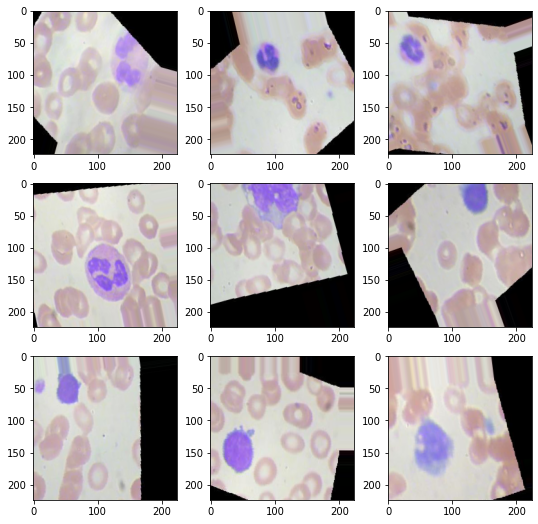

In [10]:
# Visualiasi data Train
plt.figure(figsize=(9,9))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]
    image = batch[0]
    plt.imshow(image)
plt.show();

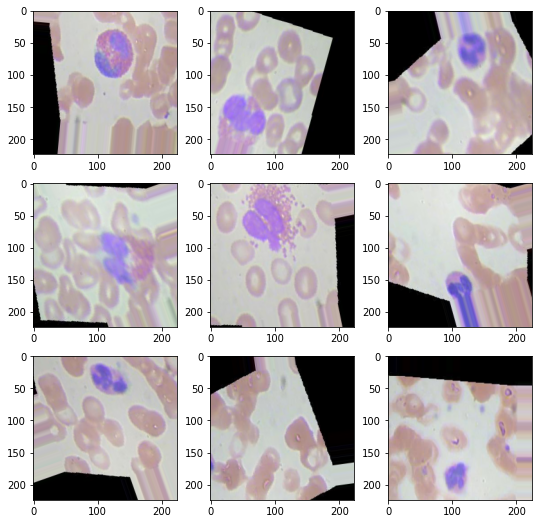

In [11]:
# Visualiasi data Validation
plt.figure(figsize=(9,9))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = validation_generator.next()[0]
    image = batch[0]
    plt.imshow(image)
plt.show();

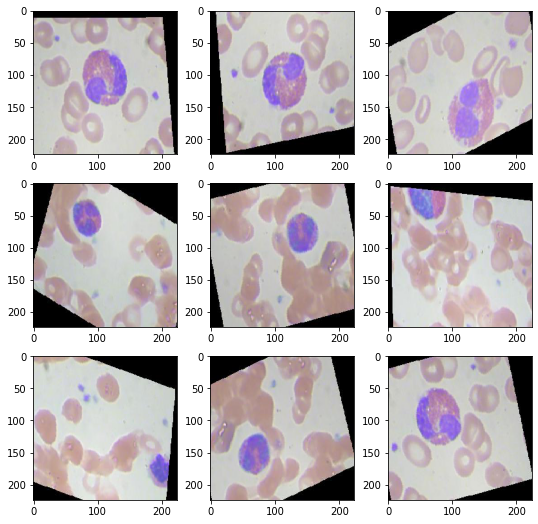

In [12]:
# Visualisasi Data Test
plt.figure(figsize=(9,9))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = test_generator.next()[0]
    image = batch[0]
    plt.imshow(image)
plt.show();

In [41]:
# from sklearn.preprocessing import LabelEncoder

# # Create an instance of the LabelEncoder
# le = LabelEncoder()

# # Extract the labels from the generators
# train_labels = np.array([label for _, label in train_generator])
# val_labels = np.array([label for _, label in validation_generator])
# test_labels = np.array([label for _, label in test_generator])

# # fit the label encoder on the train labels
# le.fit(train_labels)

# # transform the labels
# train_labels = le.transform(train_labels)
# val_labels = le.transform(val_labels)
# test_labels = le.transform(test_labels)

# # use the transformed labels
# _, train_counts = np.unique(train_labels, return_counts = True)
# _, val_counts = np.unique(val_labels, return_counts = True)
# _, test_counts = np.unique(test_labels, return_counts = True)

# pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = class_names).plot.bar()
# plt.show()

In [36]:
train_generator.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [21]:
# # Collect the labels for each set
# train_labels = [train_generator.classes[i] for i in range(len(train_generator))]
# test_labels = [test_generator.classes[i] for i in range(len(test_generator))]
# val_labels = [validation_generator.classes[i] for i in range(len(validation_generator))]

# # Use pandas to count the occurrences of each label
# import pandas as pd
# train_counts = pd.Series(train_labels).value_counts()
# print("Training set label counts: \n", train_counts)

# test_counts = pd.Series(test_labels).value_counts()
# print("Test set label counts: \n", test_counts)

# val_counts = pd.Series(val_labels).value_counts()
# print("Validation set label counts: \n", val_counts)

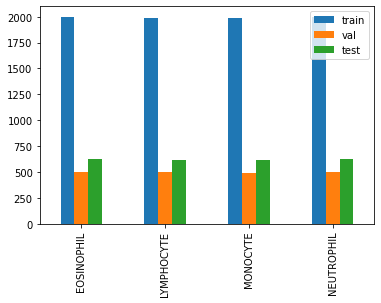

In [64]:
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

_, train_counts = np.unique(train_generator.classes, return_counts = True)
_, val_counts = np.unique(validation_generator.classes, return_counts = True)
_, test_counts = np.unique(test_generator.classes, return_counts = True)

pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = class_names).plot.bar()

plt.show()

In [65]:
pd.DataFrame({'train': train_counts, 
              "val": val_counts, 
              "test": test_counts}, 
             index = class_names)

,train,val,test
EOSINOPHIL,1998,499,623
LYMPHOCYTE,1987,496,620
MONOCYTE,1983,495,620
NEUTROPHIL,2000,499,624


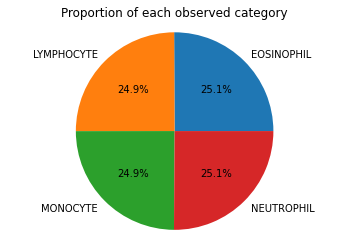

In [67]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

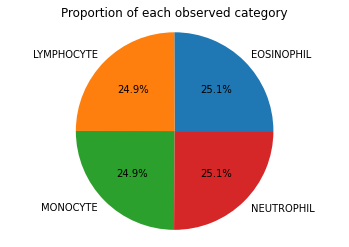

In [68]:
plt.pie(test_counts,
        explode=(0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

> Berdasarkan visuaslisasi dari 3 dataset yang kita miliki, data semua balance atau seimbang artinya tidak perlu untuk melakukan tahapan balancing dataset lagi

## **B. Build Model - VGG19**

In [90]:
vgg19 = tf.keras.applications.VGG19(include_top=False, 
                                    weights='imagenet',
                                    input_tensor=None,
                                    input_shape=(224, 224, 3), 
#                                     pooling='max', 
                                    classes=4,
                                    classifier_activation='softmax') 
print(vgg19.summary())  #membaca summary model

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Kode diatas merupakan tahapan pembuatan model menggunakan VGG19 dari modul aplikasi TensorFlow Keras. Model VGG19 ini meurpakan salah satu model CNN untuk klasifikasi gambar. Parameter yang digunakan pada kode diatas yakni:

* **`include_top`** = **False** artinya lapisan yang terhubung sepenuhnya di bagian atas model, yang digunakan untuk klasifikas tidak akan diikutsertakan.

* **`weights`** = `imagenet` menetapkan bahwa model harus diinisialisasi dengan bobot yang telah dilatih sebelumnya dari kumpulan data ImageNet.

* **`input_tensor`** = **None** berarti tidak ada tensor input yang akan diteruskan ke model.

* **`input_shape`** = **(224, 224, 3)** mengatur bentuk gambar input menjadi 224x224 piksel dan 3 saluran warna (RGB) Red, Green, Blue atau berwarna.

* **`pooling`** = `max` menentukan bahwa max pooling harus digunakan dalam model. Dimana, max pooling ini merupakan salah satu teknik untuk downsample dimensi dari iamge pada CNN sambil mempertahankan fitur-fitur penting didalamnya. 

* **`classes`** = **4** menetapkan bahwa model harus dilatih untuk mengklasifikasikan gambar ke dalam 4 kelas.

* **`classifier_activation`** = `softmax` menetapkan bahwa fungsi aktivasi softmax harus digunakan pada lapisan klasifikasi akhir model.

### Model VGG19

Kode dibawah berguna untuk membuat model (VGG19) menggunakan fungsi dari Sequential API dari Keras yang mana memungkinkan kita menambah layer satu persatu kemudian memodifikasi layer dari model VGG19.

Kode looping dibawah dibuat sebagai cara untuk menyempurnakan model VGG19 yang telah dilatih sebelumnya pada kumpulan data baru. Dengan membekukan lapisan bawah model, proses pelatihan hanya akan memperbarui bobot dari 4 lapisan terakhir, yang memungkinkan model beradaptasi dengan data baru sambil tetap memanfaatkan bobot yang telah dilatih sebelumnya di lapisan bawah.

In [91]:
model = Sequential()

# looping pertama
for layer in vgg19.layers[:-4]: #melakukan subset dari layer kecuali 4 terakhir agar tidak dilakukan pelatihan. Artinya lapisan yang dilakukan pelatihan hanya hanya 4 lapisan terakhir yang tetap dapat dilatih.
  layer.trainable=False
#looping kedua
for layer in vgg19.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f2ccc526b50> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc513e90> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc53a050> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2ccc58c5d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4aa990> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4e9a50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2ccc4c3a90> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4b8150> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4b5ed0> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4cdcd0> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc456a50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2ccc533810> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4d1550> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc4c9c50> False
<keras.layers.convolutional.Conv2D object at 0x7f2ccc466c10>

In [92]:
# Add the vgg convolutional base model
model.add(vgg19)
 
# Add new layers
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.summary()



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 25088)             100352    
_________________________________________________________________
dense_24 (Dense)             (None, 32)                802848    
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32)                128       
_________________________________________________________________
dense_25 (Dense)             (None, 16)              

Kode diatas merupakan tahapan dalam membuat model menggunakan CNN dengan arsitektur VGG19. Model diatas dutambah beberapa lapisan, dimana lapisan pertama dengan `model.add(vgg19)` dimana memanggil model VGG19 yang sebelumnya sudah di run dan dilatih sebelumnya sebagai titik awal training model. 
Setelah itu, kita menambahkan beberapa layer baru kedalam model. Rincian pada setiap layer:

* `Flatten()`: Lapisan ini berguna untuk meratakan output dari lapisan sebelumnya, yang diperlukan untuk menyiapkan data untuk lapisan yang terhubung sepenuhnya.

* `BatchNormalization()`: Lapisan ini berguna untuk menormalkan output dari lapisan sebelumnya, yang dapat membantu meningkatkan kinerja model dengan mengurangi pergeseran kovariat internal.

* `Dense(32, activation='relu' )`: Lapisan ini adalah lapisan yang terhubung sepenuhnya dengan 32 neuron dan fungsi aktivasi unit linier yang diperbaiki dengan (ReLU). Fungsi aktivasi ReLU digunakan untuk memperkenalkan non-linearitas dalam model.

* `Dropout(0.2)`: Lapisan ini digunakan untuk mencegah overfitting dengan menonaktifkan secara acak 20% neuron di lapisan sebelumnya selama pelatihan.

Lapisan di atas diulang beberapa kali, dengan jumlah neuron di lapisan padat berkurang setiap kali, dan lapisan terakhir adalah lapisan **`Dense(4, activation='softmax')`** yang terhubung sepenuhnya dengan 4 neuron dan fungsi aktivasi softmax. Fungsi softmax digunakan untuk klasifikasi multi-kelas, di mana ia menghitung probabilitas untuk setiap kelas.

Terakhir, **`model.summary()`** fungsi tersebut digunakan untuk mencetak ringkasan arsitektur model, termasuk jumlah parameter untuk setiap lapisan.

In [93]:
from random import seed
# set seed 
seed(111)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Kode diatas digunakan untuk mengkompilasi model vgg19. Pengaturan ini diperlukan agar model dapat melatih dan mengevaluasi kinerjanya.

1. Fungsi pertama yakni `loss` -> berfungsi untuk menentukan fungsi kerugian yang digunakan selama proses training. Dalam hal ini, fungsi loss yang digunakan adalah `categorical_crossentropy`, yang merupakan fungsi loss yang umum digunakan untuk klasifikasi multi-kelas. Fungsi loss ini mengukur perbedaan antara probabilitas kelas yang diprediksi dan label kelas yang sebenarnya.

2. Fungsi kedua yakni `optimizer` -> berfungsi untuk menentukan algoritma optimal yang akan digunakan untuk memperbaharui bobot model selama proses training. Dalam hal ini, algoritma yang digunakan uakni `Adam` dengan learning rate = 0,001. Adam ini merupakan algoritma yang paling populer yang mana merupakan gabungan fari algoritma AdaGrad dan RMSProp.

3. Fungsi ketiga yakni `metrics` -> berfungsi untuk menentukan metrik apa yang akan digunakan dalam proses evaluasi model selama proses training dan testing. Dalam hal ini, metrik yang digunakan yakni `accuracy` yang merupakan proporsi insttance yang diklasifikasikan dengan benar.

In [95]:
# Variabel history akan menyimpan riwayat pelatihan model, yang nantinya dapat digunakan untuk memvisualisasikan kinerja model selama training.
history = model.fit(train_generator, #turunan dari ImageDataGenerator yang berisi data gambar untuk dataset train
                    epochs=50,#menentukan berapa kali model akan mengulang seluruh dataset train.
                    callbacks=[tf.keras.callbacks.EarlyStopping( #memonitor validasi loss dan menghentikan proses pelatihan jika validasi loss tidak membaik selama 3 epoch. Ini juga mengembalikan bobot model terbaik.
                        monitor='val_loss',
                        patience=3,
                        restore_best_weights=True)],#digunakan untuk menentukan daftar callback yang akan dipanggil pada titik berbeda selama training
                    validation_data=validation_generator, #digunakan untuk menentukan set validasi yang akan digunakan untuk mengevaluasi performa model selama trainign. 
                    verbose=1) #digunakan untuk menentukan tingkat detail yang akan dicetak ke konsol selama pelatihan


Epoch 1/50
249/249 [==============================] - 129s 518ms/step - loss: 0.5293 - accuracy: 0.7790 - val_loss: 0.4007 - val_accuracy: 0.8185
Epoch 2/50
249/249 [==============================] - 128s 513ms/step - loss: 0.4589 - accuracy: 0.8237 - val_loss: 0.3707 - val_accuracy: 0.8512
Epoch 3/50
249/249 [==============================] - 127s 512ms/step - loss: 0.4629 - accuracy: 0.8291 - val_loss: 0.2798 - val_accuracy: 0.8889
Epoch 4/50
249/249 [==============================] - 128s 513ms/step - loss: 0.4102 - accuracy: 0.8507 - val_loss: 0.2631 - val_accuracy: 0.9085
Epoch 5/50
249/249 [==============================] - 128s 515ms/step - loss: 0.3892 - accuracy: 0.8591 - val_loss: 0.2424 - val_accuracy: 0.9186
Epoch 6/50
249/249 [==============================] - 128s 513ms/step - loss: 0.3736 - accuracy: 0.8683 - val_loss: 0.1884 - val_accuracy: 0.9321
Epoch 7/50
249/249 [==============================] - 129s 517ms/step - loss: 0.3614 - accuracy: 0.8744 - val_loss: 0.5457 -

Melakukan save model vgg19 yang sudah dibuat dalam format `.h5`

In [97]:
# Variabel history akan menyimpan riwayat pelatihan model, yang nantinya dapat digunakan untuk memvisualisasikan kinerja model selama training.
history2 = model.fit(train_generator, #turunan dari ImageDataGenerator yang berisi data gambar untuk dataset train
                    epochs=20,#menentukan berapa kali model akan mengulang seluruh dataset train.
                    validation_data=validation_generator, #digunakan untuk menentukan set validasi yang akan digunakan untuk mengevaluasi performa model selama trainign. 
                    verbose=1) #digunakan untuk menentukan tingkat detail yang akan dicetak ke konsol selama pelatihan


Epoch 1/20
249/249 [==============================] - 129s 517ms/step - loss: 0.3512 - accuracy: 0.8776 - val_loss: 0.2744 - val_accuracy: 0.9186
Epoch 2/20
249/249 [==============================] - 128s 514ms/step - loss: 0.3260 - accuracy: 0.8857 - val_loss: 0.5850 - val_accuracy: 0.8205
Epoch 3/20
249/249 [==============================] - 129s 518ms/step - loss: 0.2867 - accuracy: 0.9000 - val_loss: 0.4223 - val_accuracy: 0.8753
Epoch 4/20
249/249 [==============================] - 131s 528ms/step - loss: 0.3128 - accuracy: 0.8940 - val_loss: 0.1803 - val_accuracy: 0.9361
Epoch 5/20
249/249 [==============================] - 128s 515ms/step - loss: 0.2613 - accuracy: 0.9125 - val_loss: 0.1624 - val_accuracy: 0.9502
Epoch 6/20
249/249 [==============================] - 129s 519ms/step - loss: 0.2690 - accuracy: 0.9134 - val_loss: 0.2231 - val_accuracy: 0.9301
Epoch 7/20
249/249 [==============================] - 130s 522ms/step - loss: 0.2636 - accuracy: 0.9119 - val_loss: 0.0921 -

## **C. Evaluasi Model - VGG19**

In [98]:
#Save Model VGG19
model.save("/kaggle/working/model_vgg19_1.h5")#1=71%

In [82]:
#Save Model VGG19
model.save("/kaggle/working/model_vgg19.h5")

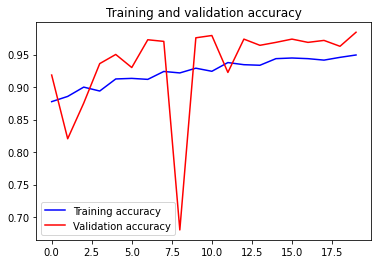

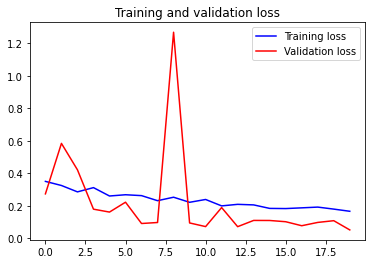

In [100]:
#Menampilkan plot 
accuracy = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [101]:
CLASS_NAMES = list(train_generator.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [102]:
model=load_model("/kaggle/working/model_vgg19_1.h5")

Test Accuracy: 72.899%


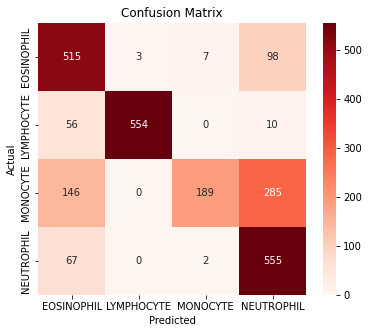

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.66      0.83      0.73       623
  LYMPHOCYTE       0.99      0.89      0.94       620
    MONOCYTE       0.95      0.30      0.46       620
  NEUTROPHIL       0.59      0.89      0.71       624

    accuracy                           0.73      2487
   macro avg       0.80      0.73      0.71      2487
weighted avg       0.80      0.73      0.71      2487



In [103]:
predictions = np.argmax(model.predict(test_generator), axis=1) # 

acc = accuracy_score(test_generator.labels, predictions)
cm = tf.math.confusion_matrix(test_generator.labels, predictions)
clr = classification_report(test_generator.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Validation Accuracy: 96.129%


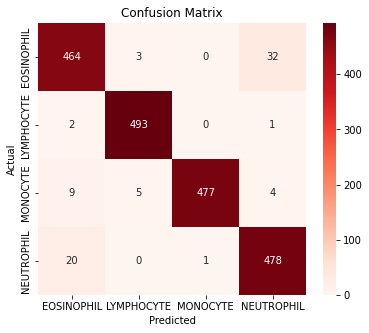

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.94      0.93      0.93       499
  LYMPHOCYTE       0.98      0.99      0.99       496
    MONOCYTE       1.00      0.96      0.98       495
  NEUTROPHIL       0.93      0.96      0.94       499

    accuracy                           0.96      1989
   macro avg       0.96      0.96      0.96      1989
weighted avg       0.96      0.96      0.96      1989



In [83]:
predictions = np.argmax(model.predict(validation_generator), axis=1) # 

acc = accuracy_score(validation_generator.labels, predictions)
cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

78/78 [==============================] - 8s 99ms/step - loss: 1.2617 - accuracy: 0.7101
Loss of the model is -  1.2616589069366455
Accuracy of the model is -  71.00924849510193 %
              precision    recall  f1-score   support

  EOSINOPHIL       0.71      0.63      0.67       623
  LYMPHOCYTE       0.89      1.00      0.94       620
    MONOCYTE       0.91      0.29      0.44       620
  NEUTROPHIL       0.55      0.92      0.69       624

    accuracy                           0.71      2487
   macro avg       0.77      0.71      0.69      2487
weighted avg       0.77      0.71      0.69      2487

Confusion Matrix


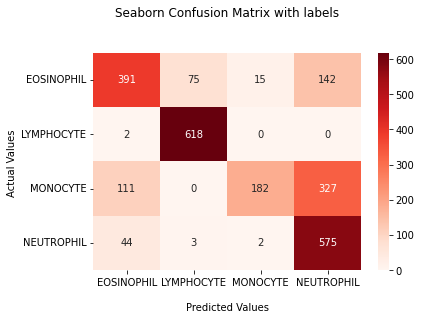

In [84]:
# Confussion Matrix dengan data test
def evaluate_model(model, test_generator):
  evaluate = model.evaluate(test_generator)
  print('Loss of the model is - ', evaluate[0])
  print('Accuracy of the model is - ', evaluate[1]*100, '%')

  classes =  list(test_generator.class_indices.keys())
  Y_pred = model.predict(test_generator)
  y_pred = np.argmax(Y_pred, axis=1)
  
  print(classification_report(test_generator.classes, y_pred, target_names=classes))
  print('Confusion Matrix')


  # acc = accuracy_score(validation_generator.labels, predictions)
  # cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
  # clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)

  conf_matrix = confusion_matrix(test_generator.classes, y_pred)
  df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order

evaluate_model(model, test_generator)

In [103]:
# Model VGG19
print("The best Training accuracy = {:.3f}%".format(max(accuracy)*100))
print("The best validation accuracy = {:.3f}% ".format(max(val_acc)*100))
print("The best Test accuracy =",(model.evaluate(test_generator)[1]*100))

The best Training accuracy = 93.474%
The best validation accuracy = 97.185% 
78/78 [==============================] - 10s 129ms/step - loss: 0.8454 - accuracy: 0.7439
The best Test accuracy = 74.38681125640869


**Hasil image classification menggunakan model VGG19 pada data sel darah putih diatas menghasilkan accuracy sebesar:**
> The best Training accuracy = 93.474%
> The best validation accuracy = 97.185% 
> The best Test accuracy = 74.387%

---

# **RESNET50**

Berdasarkan model VGG19 diatas, hasil evaluasi pada data test masih rendah sehingga kita mencoba untuk membuat dengan model lain yakni ResNet50. Tahapan yang dilakukan kurang lebih sama dengan proses pemodelan sebelumnya, hanya saja berbeda pada tahapan pembuatan model.

In [104]:
input_tensor = Input(shape=(224, 224, 3)) #mewakili ukuran gambar (tinggi dan lebar) yang diharapkan model sebagai input.
EPOCHS = 20 #menentukan berapa kali algoritma deep learning bekerja melewati seluruh dataset baik secara forward maupun backward.
BATCH_SIZE = 32 #Batch size adalah jumlah sampel data yang biasanya melewati jaringan saraf pada satu waktu. Batch size menentukan jumlah sampel yang harus dikerjakan sebelum memperbarui parameter model internal.

x = Lambda(tf.keras.applications.resnet50.preprocess_input)(input_tensor)
resnet = ResNet50(input_tensor= x, 
                  weights='imagenet', #download weight trained on imagenet (an image dataset that has contain 1000 classes)
                  include_top=False,) #Don't add fully connected layers

94781440/94765736 [==============================] - 3s 0us/step


Kode diatas merupakan proses pembuatan model dengan arsitektur ResNet50 dari library Keras.
* `input_shape`: Diatur ke **IMAGE_SIZE + [3]**, artinya model mengharapkan bentuk input **224x224x3**, di mana dimensi terakhir mengacu pada jumlah saluran warna (RGB) pada gambar.
* `weights`: Diatur ke `imagenet`, yang berarti bahwa model akan diinisialisasi dengan bobot yang telah dilatih sebelumnya dari kumpulan data ImageNet.
* `include_top`: Ini diatur ke **False**, yang berarti bahwa lapisan yang terhubung sepenuhnya di bagian atas model tidak akan disertakan. Ini berguna ketika kita ingin menggunakan model sebagai ekstraktor fitur.

In [107]:
print("There are {} layers in model".format(len(resnet.layers)))

There are 176 layers in model


* Kita tidak ingin melatih semua model, karena semua operator convolutional pada layer pertama mengekstraksi fitur yang serupa seperti garis sederhana. Sehingga kita hanya perlu melatih model pada lapisan pertama saja. 

* jadi kita melakukan pembekuan model n ada lapisan pertama

In [108]:
for layer in resnet.layers[:140]:
    layer.trainable = False

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
___________________________________________________________________________________________

In [109]:
# # freeze the layers 
# for layer in resnet.layers:
#     layer.trainable = False
    
# Pre-trained ResNet50 Model and Modifying
# Add a new dense layer on top of the base model
x = GlobalAveragePooling2D()(resnet.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
pred = Dense(4, activation='softmax')(x)

# inputs = Input(shape=(224, 224, 3))
model_resnet = Model(inputs=resnet.input, outputs=pred)
model_resnet.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

Kode diatas merupakan tahap pre-trained model:

Looping pertama digunaan untuk membekukan layer pada model. Dimana ketika layer dibekukan, bobot (weight)nya tidak akan diperbarui selama training. Hal ini berguna untuk mempertahankan fitur yang dipelajari dari tugas awal saat melatih tugas baru.



In [111]:
# Creating data generator object with the same preprocessing done in the Resnet
train_data = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest',
                             validation_split=0.2,
                             preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [112]:
# Load the training data
train_gen = train_data.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical', 
        seed=42,
        subset = "training")

# Load the validation data
validation_gen = train_data.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False,
        seed=42,
        subset='validation')

# Load the test data
test_gen = test_data.flow_from_directory(
        test_path,
        shuffle=False, 
        batch_size=32,
        class_mode='categorical',
        seed=42,
        target_size=(224, 224))

print(test_gen.class_indices)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


min: -123.68 max: 142.061


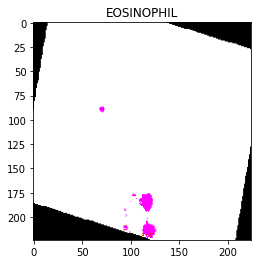

In [113]:
# Extract the labels 
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
      labels[v] = k
# should be a strangely colored image (due to Resnet weights being RGB)
# cek gambar sample yang diproses oleh model untuk data test akan seperti apa
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [114]:
from glob import glob
from keras.preprocessing import image

train_image_files = glob(train_path + "/*/*.jp*g")
validation_image_files = glob(test_path + "/*/*.jp*g")
print(f"Number of Training samples: {len(train_image_files)}")
print(f"Number of Test samples: {len(validation_image_files)}")

Number of Training samples: 9957
Number of Test samples: 2487


In [115]:
spe = int(len(train_image_files)//BATCH_SIZE)
val = int(len(validation_image_files)//BATCH_SIZE)
print(f"Training steps per epoch: {spe}")
print(f"Validation steps per epoch: {val}")
print(f"Number of epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")

Training steps per epoch: 311
Validation steps per epoch: 77
Number of epochs: 20
Batch size: 32


Banyaknya kelas: 4


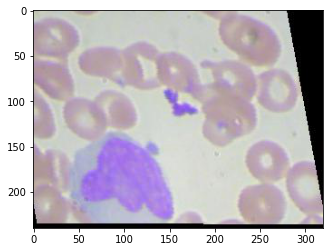

In [116]:
folders = glob(train_path + '/*')
k = len(folders)
print(f"Banyaknya kelas: {k}")

# Display a image 
plt.imshow(image.img_to_array(image.load_img(train_image_files[0])).astype('uint8'))
plt.show()

In [118]:
history_res2 = model_resnet.fit(train_gen,
                                epochs=15,
                                validation_data=validation_gen)

Epoch 1/15
249/249 [==============================] - 135s 542ms/step - loss: 0.3191 - accuracy: 0.8798 - val_loss: 0.2343 - val_accuracy: 0.9115
Epoch 2/15
249/249 [==============================] - 127s 510ms/step - loss: 0.1731 - accuracy: 0.9357 - val_loss: 0.1400 - val_accuracy: 0.9522
Epoch 3/15
249/249 [==============================] - 128s 516ms/step - loss: 0.1191 - accuracy: 0.9575 - val_loss: 0.1439 - val_accuracy: 0.9497
Epoch 4/15
249/249 [==============================] - 127s 512ms/step - loss: 0.0829 - accuracy: 0.9705 - val_loss: 0.0754 - val_accuracy: 0.9824
Epoch 5/15
249/249 [==============================] - 128s 512ms/step - loss: 0.0510 - accuracy: 0.9824 - val_loss: 0.1400 - val_accuracy: 0.9502
Epoch 6/15
249/249 [==============================] - 128s 516ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0400 - val_accuracy: 0.9864
Epoch 7/15
249/249 [==============================] - 128s 516ms/step - loss: 0.0657 - accuracy: 0.9782 - val_loss: 0.0565 -

In [42]:
# history_resnet = model_resnet.fit(train_gen,
#                           validation_data=validation_gen,
#                           epochs=EPOCHS,
#                           steps_per_epoch=spe,
#                           validation_steps= val,
#                           verbose=1)
# history_resnet =  model_resnet.fit(train_gen, #turunan dari ImageDataGenerator yang berisi data gambar untuk dataset train
#                     epochs=50,#menentukan berapa kali model akan mengulang seluruh dataset train.
#                     callbacks=[tf.keras.callbacks.EarlyStopping( #memonitor validasi loss dan menghentikan proses pelatihan jika validasi loss tidak membaik selama 3 epoch. Ini juga mengembalikan bobot model terbaik.
#                         monitor='val_loss',
#                         patience=3,
#                         restore_best_weights=True)],#digunakan untuk menentukan daftar callback yang akan dipanggil pada titik berbeda selama training
#                     validation_data=validation_gen, #digunakan untuk menentukan set validasi yang akan digunakan untuk mengevaluasi performa model selama trainign. 
#                     verbose=1) #digunakan untuk menentukan tingkat detail yang akan dicetak ke konsol selama pelatihan


Epoch 1/50
249/249 [==============================] - 137s 550ms/step - loss: 1.0810 - accuracy: 0.4729 - val_loss: 1.0650 - val_accuracy: 0.4811
Epoch 2/50
249/249 [==============================] - 136s 547ms/step - loss: 1.0614 - accuracy: 0.4775 - val_loss: 1.0385 - val_accuracy: 0.4857
Epoch 3/50
249/249 [==============================] - 136s 545ms/step - loss: 1.0557 - accuracy: 0.4912 - val_loss: 1.0262 - val_accuracy: 0.4867
Epoch 4/50
249/249 [==============================] - 138s 556ms/step - loss: 1.0627 - accuracy: 0.4912 - val_loss: 1.0298 - val_accuracy: 0.4997
Epoch 5/50
249/249 [==============================] - 137s 551ms/step - loss: 1.0431 - accuracy: 0.4895 - val_loss: 0.9980 - val_accuracy: 0.5304
Epoch 6/50
249/249 [==============================] - 135s 542ms/step - loss: 1.0279 - accuracy: 0.5067 - val_loss: 1.0279 - val_accuracy: 0.5028
Epoch 7/50
249/249 [==============================] - 136s 545ms/step - loss: 1.0206 - accuracy: 0.4999 - val_loss: 1.0089 -

In [119]:
#Save Model MVNET 
model_resnet.save("/kaggle/working/model_resnet_2.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [120]:
model_resnet=load_model("/kaggle/working/model_resnet_2.h5")

## EVakuasi MODEL RESNET50 
Dengan dense 512 dan 1012

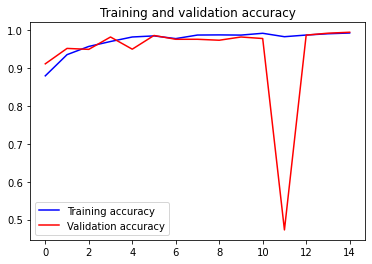

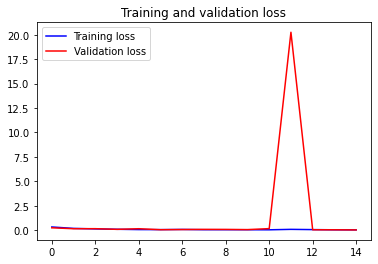

In [121]:
#Menampilkan plot 
accuracy = history_res2.history['accuracy']
val_acc = history_res2.history['val_accuracy']
loss = history_res2.history['loss']
val_loss = history_res2.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

78/78 [==============================] - 12s 143ms/step - loss: 1.1270 - accuracy: 0.8110
Loss of the model is -  1.1269798278808594
Accuracy of the model is -  81.10172748565674 %
              precision    recall  f1-score   support

  EOSINOPHIL       0.81      0.82      0.81       623
  LYMPHOCYTE       0.96      0.88      0.92       620
    MONOCYTE       0.85      0.63      0.73       620
  NEUTROPHIL       0.69      0.91      0.78       624

    accuracy                           0.81      2487
   macro avg       0.83      0.81      0.81      2487
weighted avg       0.83      0.81      0.81      2487

Confusion Matrix


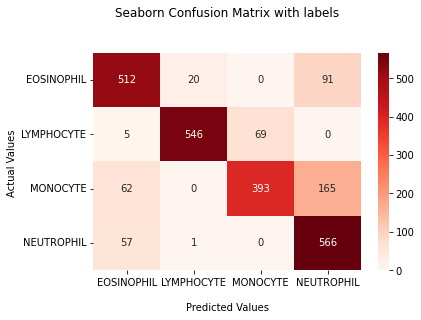

In [122]:
# Confussion Matrix dengan data test
def evaluate_model(model_resnet, test_gen):
  evaluate = model_resnet.evaluate(test_gen)
  print('Loss of the model is - ', evaluate[0])
  print('Accuracy of the model is - ', evaluate[1]*100, '%')

  classes =  list(test_gen.class_indices.keys())
  Y_pred = model_resnet.predict(test_gen)
  y_pred = np.argmax(Y_pred, axis=1)
  
  print(classification_report(test_gen.classes, y_pred, target_names=classes))
  print('Confusion Matrix')


  # acc = accuracy_score(validation_generator.labels, predictions)
  # cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
  # clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)

  conf_matrix = confusion_matrix(test_gen.classes, y_pred)
  df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order

evaluate_model(model_resnet, test_gen)

In [ ]:
# Model Resnet
print("The best Training accuracy = {:.3f}%".format(max(accuracy)*100))
print("The best validation accuracy = {:.3f}% ".format(max(val_acc)*100))
print("The best Test accuracy =",(model_resnet.evaluate(test_generator)[1]*100))

The code above first loads the ResNet50 model with pre-trained weights on the imagenet dataset, then it sets all the layers as untrainable. After that it creates the additional layers, such as the Flatten and Dense layers, and then compiles the model with an optimizer, loss function, and metrics. The fit method is then called on the model passing the train_generator and test_generator as the training data and validation data respectively,

---

# **MOBILENETV2**

**MobileNetV2** adalah arsitektur CNN yang dirancang khusus untuk perangkat seluler dan tersemat, dengan fokus pada efisiensi dan kecepatan. Ini adalah versi yang lebih ringan dan lebih cepat dari arsitektur MobileNet asli, dan dikenal karena kinerjanya yang baik pada berbagai tugas klasifikasi gambar sekaligus lebih efisien secara komputasi daripada VGG19 dan Resnet50.

Di sisi lain, **VGG19 dan ResNet50** keduanya adalah arsitektur CNN populer yang telah dilatih pada kumpulan data ImageNet, yang merupakan kumpulan data gambar yang besar dan label yang sesuai. VGG19 dikenal karena kinerjanya yang baik pada kumpulan data ImageNet dan kemampuannya untuk mengekstraksi fitur canggih dari gambar. ResNet50, di sisi lain, dikenal karena kemampuannya untuk melatih jaringan yang sangat dalam tanpa mengalami masalah gradien menghilang dan kinerjanya yang baik pada kumpulan data Imagenet.

Saat membandingkan MobileNetV2 dengan VGG19 dan ResNet50, satu perbedaan utama adalah jumlah parameter. MobileNetV2 memiliki parameter yang jauh lebih sedikit daripada VGG19 dan ResNet50. Ini berarti bahwa MobileNetV2 membutuhkan lebih sedikit memori dan sumber daya komputasi.

Perbedaan utama lainnya adalah biaya komputasi, MobileNetV2 dirancang agar lebih efisien dalam hal komputasi dan karena itu lebih cepat dijalankan di perangkat seluler dan tersemat.

> Singkatnya, MobileNetV2 adalah model komputasi yang lebih efisien dibandingkan dengan VGG19 dan ResNet50, dan sangat cocok untuk perangkat seluler dan tersemat. Namun, VGG19 dan ResNet50 adalah model yang lebih kuat yang telah dilatih pada kumpulan data besar dan telah terbukti bekerja dengan baik pada berbagai tugas klasifikasi gambar. Model terbaik untuk digunakan akan bergantung pada karakteristik khusus dari kumpulan data, masalah yang Anda coba selesaikan, dan sumber daya yang Anda miliki.


## Load Data Image 

Memuat data dengan menggunakan fungsi preprocessing **preprocess_input** dari modul **mobilenet_v2** dari paket **tf.keras.applications**. Fungsi ini khusus untuk arsitektur MobileNetV2 dan digunakan untuk menyiapkan gambar masukan untuk model. Tidak cocok untuk digunakan dengan model lain seperti VGG19 atau ResNet50.

In [124]:
# Create generators
train_gen_mobile = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
) #Membagi data train menjadi train dan validation dengan proporsi 80% dan 20%

test_gen_mobile = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

Dalam kode yang dibawa ini data train diteruskan ke **train_gen.flow_from_directory** dengan **subset='training'** dan gambar validasi diteruskan ke **train_gen.flow_from_directory** dengan **subset='validation'**, dengan cara ini gambar set validasi tidak ditambah, dan gambar test diteruskan ke **test_gen.flow_from_directory** dengan **shuffle=False** yang berarti bahwa gambar tidak ditambah. Dengan cara ini kita dapat memastikan bahwa validasi dan test tidak ditambah atau tidak dilakukan augmentasi seperti pada data train.

Penting untuk kita pisahkan set validasi dan set train dari set test dan juga untuk tidak menggunakan teknik augmentasi data apa pun pada mereka karena ini dapat memberi kita evaluasi yang lebih realistis tentang kinerja model yang telah kita buat pada data yang tidak terlihat (test).

Singkatnya, tidak disarankan untuk menerapkan augmentasi pada data ke set validasi dan pengujian, karena dapat menyebabkan overfitting dan dapat memberikan estimasi kinerja model yang terlalu optimis. Kode yang disediakan tidak menambah validasi dan set pengujian, ini merupakan praktik yang baik.

In [125]:
train_images=train_gen_mobile.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_gen_mobile.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_gen_mobile.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


## Build Pre Trained Model

In [126]:
# Load pretrained model
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# The convolutional layers have already been optimized to extract features
pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


Kode diatas memuat versi pretrained model MobileNetV2 dari modul **tf.keras.applications** TensorFlow, dengan 
* `input shape` = (224.224,3), artinya model mengharapkan gambar dengan tinggi dan lebar 224 piksel dan 3 saluran warna (merah, hijau, biru) dimana ini merupakan hasil perubahan dimensi gambar awal dari 320x240 piksel. 
* `include_top` = False, artinya lapisan atas model (lapisan klasifikasi) tidak disertakan. 
* `weights` = 'imagenet', artinya model akan diinisialisasi dengan bobot yang telah dilatih sebelumnya dari kumpulan data ImageNet. 
* `pooling`= diatur ke **'avg'**, artinya pooling rata-rata global akan digunakan sebagai keluaran model.

`pretrained_model.trainable` = False, artinya menetapkan semua lapisan dalam model menjadi tidak dapat dilatih, yang berarti bahwa parameter lapisan tidak akan diperbarui selama proses training. Hal ini berguna saat menggunakan model pra-pelatihan sebagai ekstraktor fitur, karena memastikan bahwa fitur yang dipelajari tidak berubah selama pelatihan.






## Build Classification Model

In [128]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x) #terdapat 4 kelas klasifikasi gambar 

model_mvnet = tf.keras.Model(inputs=inputs, outputs=outputs)

model_mvnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In this example, a pre-trained MobileNetV2 model is loaded using the tf.keras.applications.MobileNetV2 class with the weights='imagenet' option, which loads the model with weights pre-trained on the ImageNet dataset. The include_top=False option is used to exclude the fully connected layer of the model.

Then, the layers of the pre-trained model are frozen, by setting pretrained_model.trainable = False, this way the weights will not be updated during training.

A new model is created on top of the pre-trained model, by adding a new dense layer to the output of the model. The new dense layer has 128 units and a 'relu' activation function. Then, another dense layer with 4 units and 'softmax' activation function is added to the output of the previous dense layer.

In [129]:
history_mvnet = model_mvnet.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True)])

Epoch 1/100
249/249 [==============================] - 35s 130ms/step - loss: 0.9208 - accuracy: 0.6251 - val_loss: 0.6535 - val_accuracy: 0.7627
Epoch 2/100
249/249 [==============================] - 29s 118ms/step - loss: 0.5601 - accuracy: 0.7934 - val_loss: 0.5020 - val_accuracy: 0.8064
Epoch 3/100
249/249 [==============================] - 28s 112ms/step - loss: 0.4277 - accuracy: 0.8459 - val_loss: 0.4644 - val_accuracy: 0.8150
Epoch 4/100
249/249 [==============================] - 28s 113ms/step - loss: 0.3636 - accuracy: 0.8682 - val_loss: 0.3951 - val_accuracy: 0.8451
Epoch 5/100
249/249 [==============================] - 29s 117ms/step - loss: 0.3106 - accuracy: 0.8860 - val_loss: 0.4073 - val_accuracy: 0.8366
Epoch 6/100
249/249 [==============================] - 29s 117ms/step - loss: 0.2846 - accuracy: 0.8961 - val_loss: 0.4346 - val_accuracy: 0.8200
Epoch 7/100
249/249 [==============================] - 28s 111ms/step - loss: 0.2446 - accuracy: 0.9116 - val_loss: 0.3349 -

In [130]:
#Save Model MVNET 
model_mvnet.save("/kaggle/working/model_mvnet.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [131]:
model_mvnet=load_model("/kaggle/working/model_mvnet.h5")

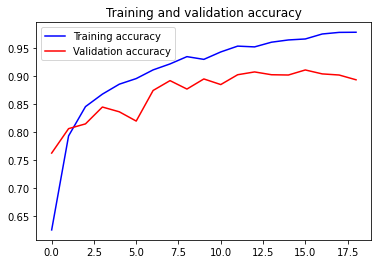

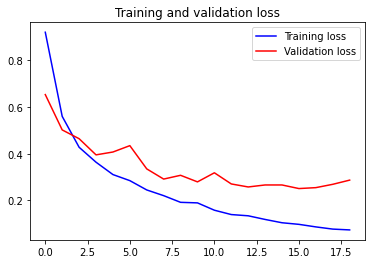

In [132]:
#Menampilkan plot history
accuracy = history_mvnet.history['accuracy']
val_acc = history_mvnet.history['val_accuracy']
loss = history_mvnet.history['loss']
val_loss = history_mvnet.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

## **Evaluasi Model MobilenetV2**


In [133]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Test Accuracy: 50.784 %


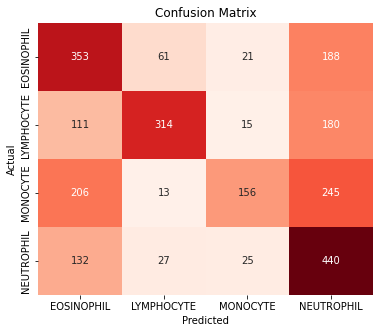

Classification Report:
-----------------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.44      0.57      0.50       623
  LYMPHOCYTE       0.76      0.51      0.61       620
    MONOCYTE       0.72      0.25      0.37       620
  NEUTROPHIL       0.42      0.71      0.52       624

    accuracy                           0.51      2487
   macro avg       0.58      0.51      0.50      2487
weighted avg       0.58      0.51      0.50      2487



In [136]:
predictions = np.argmax(model_mvnet.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

In [137]:
# Model Resnet
print("The best Training accuracy = {:.3f}%".format(max(accuracy)*100))
print("The best validation accuracy = {:.3f}% ".format(max(val_acc)*100))
print("The best Test accuracy =",(model_mvnet.evaluate(test_images)[1]*100))

The best Training accuracy = 97.904%
The best validation accuracy = 91.151% 
78/78 [==============================] - 8s 90ms/step - loss: 1.9732 - accuracy: 0.5078
The best Test accuracy = 50.78407526016235


Hasil dari evaluasi model menggunakan mobilenet V2 yakni:
> The best Training accuracy = 97.904% 
>
> The best validation accuracy = 91.151% 
>
> The best Test accuracy = 50.784%

Dari hasil diatas dapat kita lihat bahwa, ada sesuatu yang mengkhawatirkan dalam hasil yang kita dapatkan. Set validasi memiliki akurasi sekitar 91% yang bagus. Namun pada set test atau pengujian, akurasinya turun menjadi sekitar 50%. Ini tidak normal dan ini menandakan adanya ketidak miripan antara data set train dengan data test.